### PLINK: https://www.cog-genomics.org/plink2/

###### extract random SNPs  
  
`plink --noweb --bfile /projects/ps-yeolab/biom262_2017/ondrej/hapmap3 --thin 0.00001 --recode --out hapmap3_thin`

###### inspect files

###### extract SNPs on chr 21 and recode  

`plink --noweb --bfile /projects/ps-yeolab/biom262_2017/ondrej/hapmap3 --chr 21 --make-bed --out hapmap3_chr21`

###### prune for LD  
  
`plink --noweb --file hapmap3_thin --indep-pairwise 50 5 0.1`  
`plink --noweb --file hapmap3_thin --extract plink.prune.in --make-bed --out hapmap3_thin_pruned`  
`plink --noweb --bfile hapmap3_chr21 --indep-pairwise 50 5 0.1 
`plink --noweb --bfile hapmap3_chr21 --extract plink.prune.in --make-bed --out hapmap3_chr21_pruned`  
`plink --noweb --bfile /projects/ps-yeolab/biom262_2017/ondrej/hapmap3 --indep-pairwise 50 5 0.1`  
`plink --noweb --bfile /projects/ps-yeolab/biom262_2017/ondrej/hapmap3 --extract plink.prune.in --make-bed --out hapmap3_pruned`  

###### why prune?

###### create IBS matrix

`plink --noweb --bfile hapmap3_thin_pruned --cluster --distance-matrix --out hapmap3_thin_pruned`  
`plink --noweb --bfile hapmap3_chr21_pruned --cluster --distance-matrix --out hapmap3_chr21_pruned`  
`plink --noweb --bfile hapmap3_pruned --cluster --distance-matrix --out hapmap3_pruned`  


In [16]:
#start R
thin=read.table("hapmap3_thin_pruned.mdist",F)
chr21=read.table("hapmap3_chr21_pruned.mdist",F)
all=read.table("hapmap3_pruned.mdist",F)


In [17]:

#multidimensional scaling
thin_coord=cmdscale(thin,2)
chr21_coord=cmdscale(chr21,2)
all_coord=cmdscale(all,2)


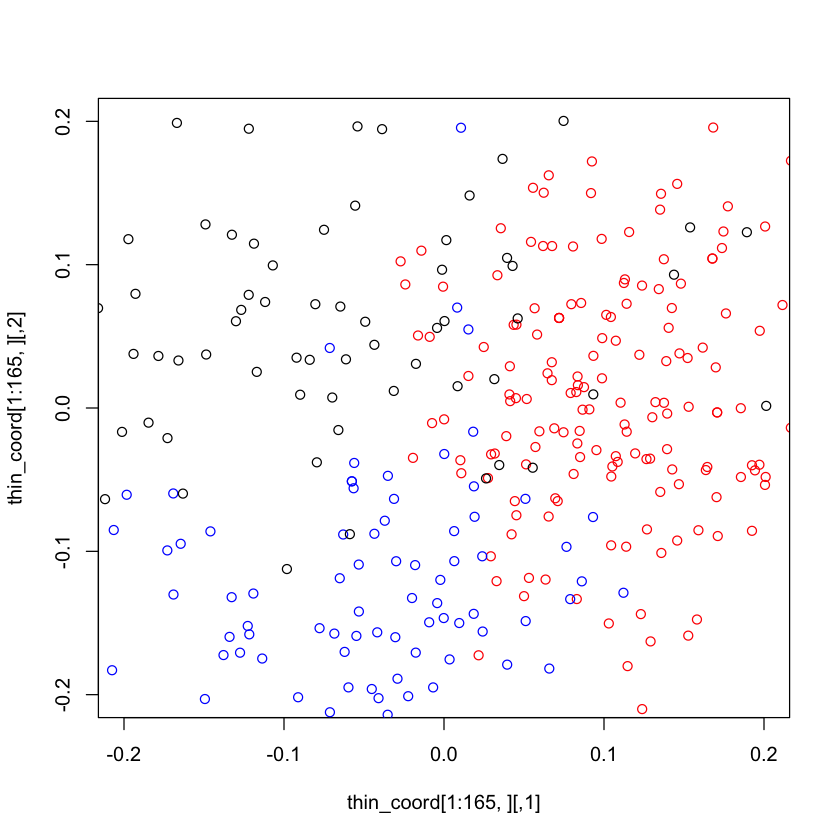

In [18]:

#plot
plot(thin_coord[1:165,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),col="red")
points(thin_coord[166:250,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),col="blue",type="p")
points(thin_coord[251:317,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),type="p")


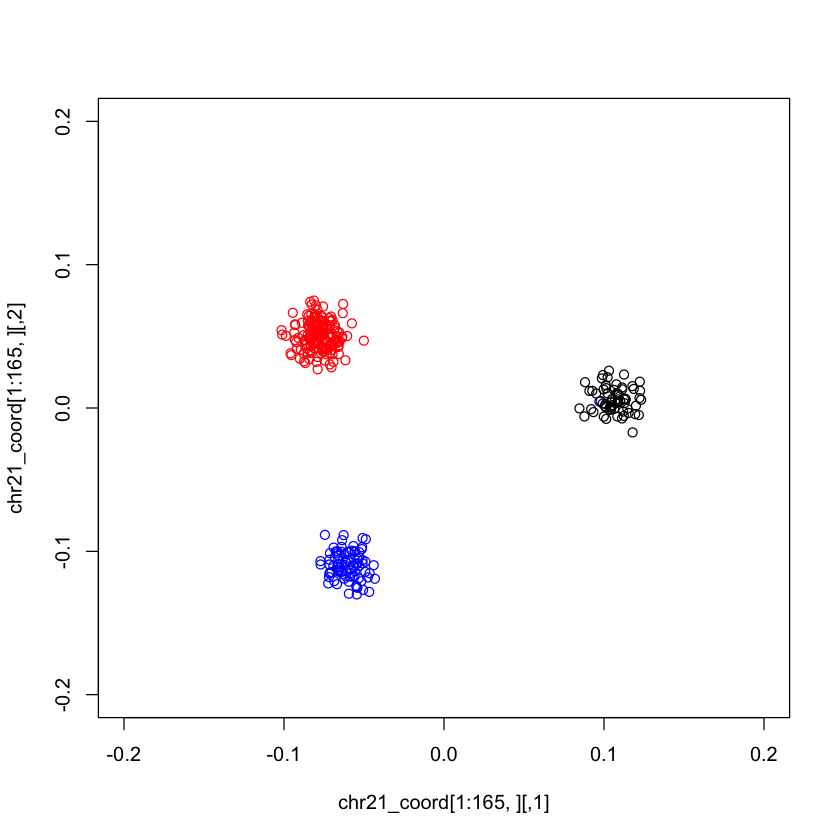

In [19]:

plot(chr21_coord[1:165,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),col="red")
points(chr21_coord[166:250,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),col="blue",type="p")
points(chr21_coord[251:317,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),type="p")


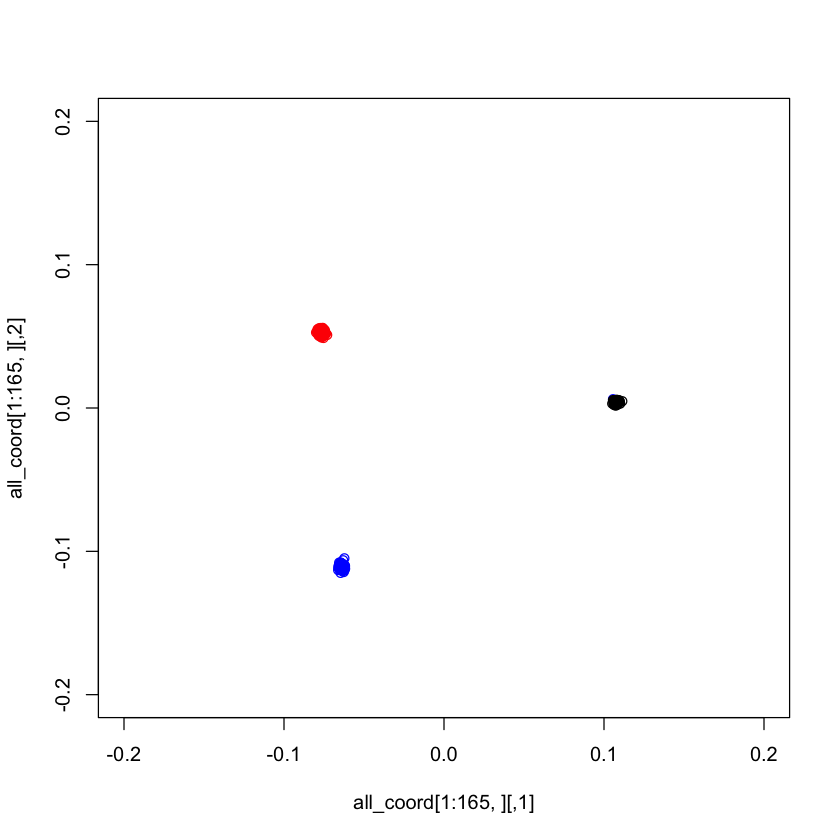

In [20]:

plot(all_coord[1:165,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),col="red")
points(all_coord[166:250,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),col="blue",type="p")
points(all_coord[251:317,],xlim=c(-0.2,0.2),ylim=c(-0.2,0.2),type="p")


In [25]:

#what if we didn't use SNPs but rarer variation?
#only higher frequency?
#what if we used coding SNPs?
#what about other types of variation?
#what if the population were Italians, French and English? Would we need more or fewer markers?
#what about Mexicans and African Americans? would they cluster? 
#why is this a problem in mapping? What are the solutions?

#grouping as a predictor:
pred=cbind(c(rep(1,165),rep(0,(416-165))), c(rep(0,165),rep(1,84),rep(0,(416-249))) ,c(rep(0,249),rep(1,(416-249))))


#GAMOVA
install.packages('vegan', repos='http://cran.us.r-project.org')
library(vegan)
adonis(thin~pred)
adonis(chr21~pred)
adonis(all~pred)

#random grouping
p=rep(c(0,1),208)
adonis(all~p)

#why do we get lots more variation explained?



Warning message:
In install.packages("vegan", repos = "http://cran.us.r-project.org"): installation of package ‘vegan’ had non-zero exit status


The downloaded source packages are in
	‘/private/var/folders/5s/hfqw0tvn5k70swhg64fydljr0000gn/T/RtmpP9Hp5q/downloaded_packages’


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library(vegan): there is no package called ‘vegan’


ERROR: Error in eval(expr, envir, enclos): could not find function "adonis"


ERROR: Error in eval(expr, envir, enclos): could not find function "adonis"


ERROR: Error in eval(expr, envir, enclos): could not find function "adonis"


ERROR: Error in eval(expr, envir, enclos): could not find function "adonis"


### LEPTOSPIROSIS:

###### introduce data

###### clean data:
`plink --noweb --bfile /projects/ps-yeolab/biom262_2017/ondrej/lepto_unrel --maf 0.05 --geno 0.1 --make-bed --out lepto_clean`  

###### inspect data

###### prune:
`plink --bfile lepto_clean --indep-pairwise 50 5 0.2 --noweb`  
`plink --bfile lepto_clean --extract plink.prune.in --make-bed --out lepto_pruned --noweb`  

###### run unsupervised admixture with 2,3,4,5 clusters
`admixture lepto_pruned.bed 2`  
`admixture lepto_pruned.bed 3`  
`admixture lepto_pruned.bed 4`  

###### crossvalidation to select best K in bash:
`for K in 1 2 3; do admixture --cv lepto_pruned.bed $K | tee log${K}.out; done`

CV error (K=1): 0.56669
CV error (K=2): 0.55879
CV error (K=3): 0.56194
CV error (K=4): 0.56811
CV error (K=5): 0.56935

###### inspect

In [27]:
a=read.table("lepto_pruned.2.P",F)
barplot(t(a[order(a[,1]),]),col=c("red","green),border=NA)

ERROR: Error in parse(text = x, srcfile = src): <text>:2:41: unexpected INCOMPLETE_STRING
1: a=read.table("lepto_pruned.2.P",F)
2: barplot(t(a[order(a[,1]),]),col=c("red","green),border=NA)
                                           ^



###### run association  
`plink --bfile lepto_clean --noweb --assoc --adjust --qq-plot --out lepto_clean`  

##### why do we need to remove unrelateds?


In [ ]:

#make qq plot in R:
data <- read.table("lepto_clean.assoc.adjusted",T)
#png("qqplot.png")`  
plot(-log10(data$QQ),-log10(data$UNADJ),xlab="expected –logP values",ylab="observed –logP values")`  
abline(a = 0, b = 1)`  
#dev.off()`  



###### inspect plot
###### explain inflation, ask for possible causes

#run a linear model with MDS as covariates:
`plink --bfile lepto_pruned --noweb --mds-plot 10 --out cov`  

`plink --bfile lepto_clean --noweb --linear --covar cov.mds --covar-number 1,2,4-13 --adjust --qq-plot --out lepto_clean_mds`  


Warning message:
In title(...): conversion failure on 'expected –logP values' in 'mbcsToSbcs': dot substituted for <e2>Warning message:
In title(...): conversion failure on 'expected –logP values' in 'mbcsToSbcs': dot substituted for <80>Warning message:
In title(...): conversion failure on 'expected –logP values' in 'mbcsToSbcs': dot substituted for <93>Warning message:
In title(...): conversion failure on 'observed –logP values' in 'mbcsToSbcs': dot substituted for <e2>Warning message:
In title(...): conversion failure on 'observed –logP values' in 'mbcsToSbcs': dot substituted for <80>Warning message:
In title(...): conversion failure on 'observed –logP values' in 'mbcsToSbcs': dot substituted for <93>

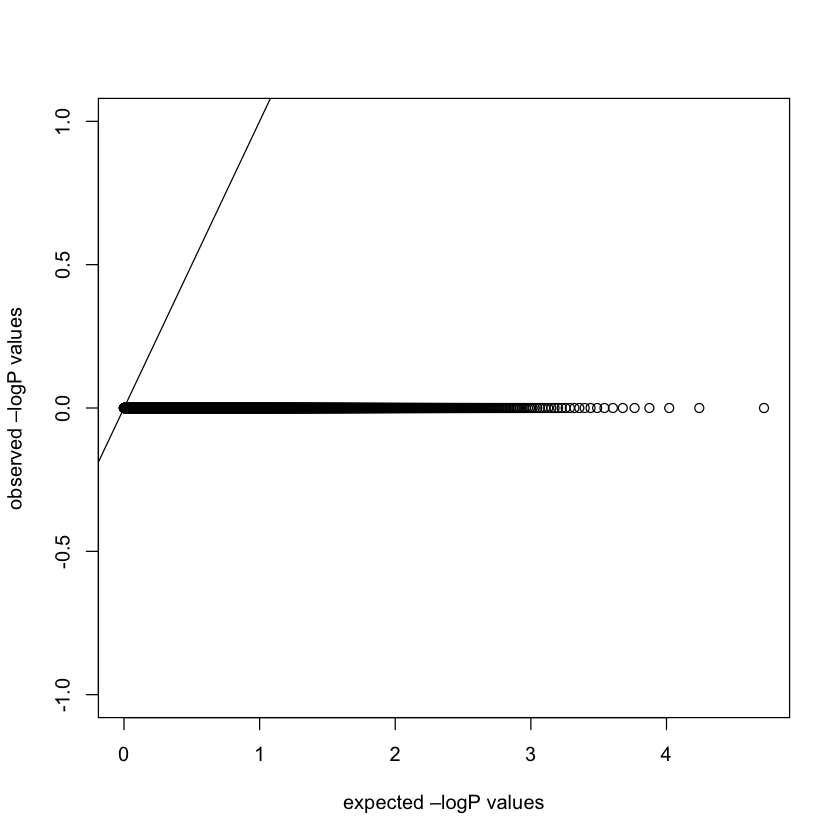

In [29]:

#make qq plot in R:
data <- read.table("lepto_clean_mds.assoc.logistic.adjusted",T)
#png("qqplot_mds.png")
plot(-log10(data$QQ),-log10(data$UNADJ),xlab="expected –logP values",ylab="observed –logP values")
abline(a = 0, b = 1)
#dev.off()
